# Creating bodies

The most basic functions of this package create an object of type
`Body`. There are a variety of such functions, a few of which we will demonstrate here.
Generally speaking, we are interesting in creating the object and placing it
in a certain position and orientation. We do this in two steps: we create the
basic shape, centered at the origin with a default orientation, and then
we transform the shape to a desired location and orientation. We will discuss
the shapes in this notebook, and the transforms in the following notebook.

It is useful to stress that each body stores two types of points internally:
the *endpoints* of the segments that comprise the body surface, and the
*midpoints* of these segments. The midpoints are intended for use in downstream
calculations, e.g. as forcing points in the calculations on immersed layers.
The midpoints are simply the geometric averages of the endpoints, so
endpoints are the ones that are transformed first, and midpoints are updated next.

In [1]:
using RigidBodyTools
using Plots

## Creating a shape
Let's first create a shape. For any shape, we have to make a choice of the
geometric dimensions (e.g, radius of the circle, side lengths of a rectangle),
as well as the points that we use to discretely represent the surface.
For this latter choice, there are two constructor types: we can specify the
number of points (as an integer), or we can specify the nominal spacing between
points (as a floating-point number).

The second approach is usually preferable when we use these tools for constructing immersed bodies.
It is important to stress that the algorithms for placing points attempt to make the spacing
as uniform as possible.

Let's create the most basic shape, a circle of radius 1. We will discretize
it with 100 points first:

In [2]:
b = Circle(1.0,100)

Circular body with 100 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


Now we will create the same body with a spacing of 0.02

In [3]:
b = Circle(1.0,0.02)

Circular body with 312 points and radius 1.0
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


This choice led to 312 points along the circumference. Quick math will tell
you that the point spacing is probably not exactly 0.02. In fact, you can
find out the actual spacing with `dlengthmid`. This function calculates
the spacing associated with each point. (It does so by first calculating
the spacing between midpoints between each point and its two adjacent points.)

In [4]:
dlengthmid(b)

312-element Vector{Float64}:
 0.020139095077867236
 0.020139094653432214
 0.020139095926408276
 0.020139093805405513
 0.02013909677357474
 0.02013909295944404
 0.020139097617989644
 0.02013909211691784
 0.020139098458281813
 0.020139091279197854
 ⋮
 0.02013909887637942
 0.02013909169745211
 0.020139098038654317
 0.020139092537748232
 0.02013909719612995
 0.020139093382162535
 0.02013909635016884
 0.020139094229325732
 0.0201390955021457

It is just a bit larger than 0.02.

A few other useful functions on the shape. To simply know the number of points,

In [5]:
length(b)

312

To find the outward normal vectors (based on the perpendicular to the line
joining the adjacent midpoints):

In [6]:
nx, ny = normalmid(b)

([0.9999999999994525, 0.9997972500513199, 0.9991889560711672, 0.9981756172871893, 0.9967572242069976, 0.9949349397149282, 0.9927087488883388, 0.990080473523142, 0.9870500969577606, 0.983620092474754  …  0.9797908571175992, 0.9836197214184055, 0.9870504283171837, 0.9900801823981026, 0.9927089993067706, 0.9949347304092768, 0.9967573920603715, 0.9981754911583557, 0.9991890402708863, 0.9997972079172877], [1.0463938992680292e-6, 0.020136007295848538, 0.04026698480655045, 0.060377454843166735, 0.08046760833503637, 0.10052097161514166, 0.1205377114456275, 0.14050144464805614, 0.16041230032536535, 0.18025402541956284  …  -0.20002468924800312, -0.1802560502085253, -0.16041026138892794, -0.14050349612212365, -0.1205356490642922, -0.10052304325585998, -0.08046552909791128, -0.060379540001355994, -0.04026489541207215, -0.020138099234931442])

We can also plot the shape

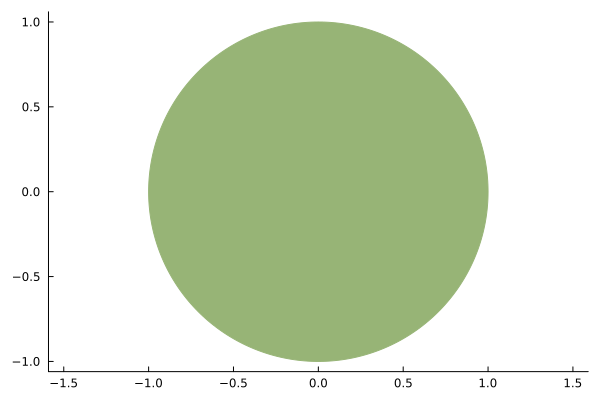

In [7]:
plot(b)

Sometimes we don't want to fill in the shape (and maybe change the line color).
In that case, we can use

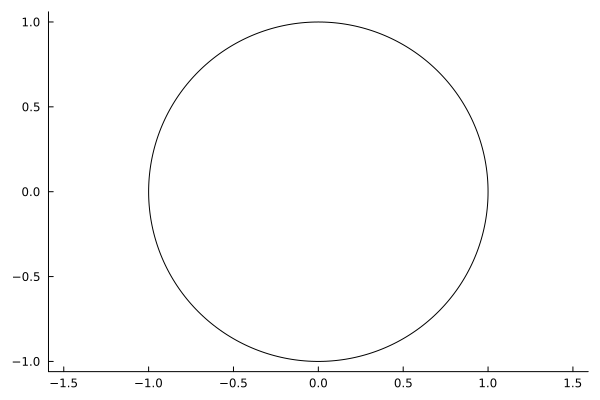

In [8]:
plot(b,fill=:false,linecolor=:black)

## Other shapes
Let's see some other shapes in action, like a square and an ellipse

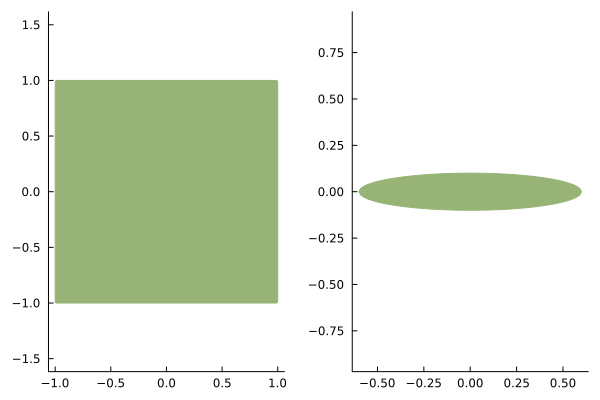

In [9]:
b1, b2 = Square(1.0,0.02), Ellipse(0.6,0.1,0.02)
plot(plot(b1), plot(b2))

A NACA 4412 airfoil, with chord length 1, and 0.02 spacing between points.

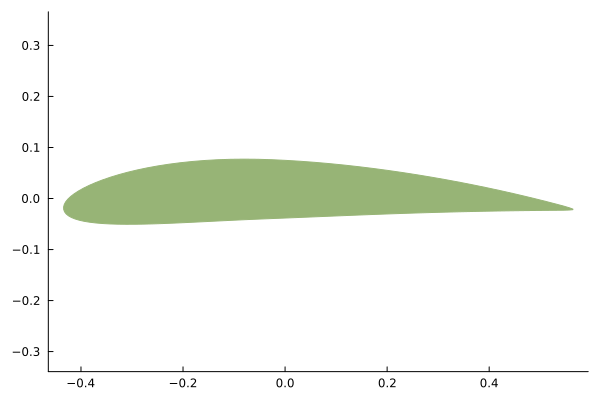

In [10]:
b = NACA4(0.04,0.4,0.12,0.02)
plot(b)

A flat plate with no thickness

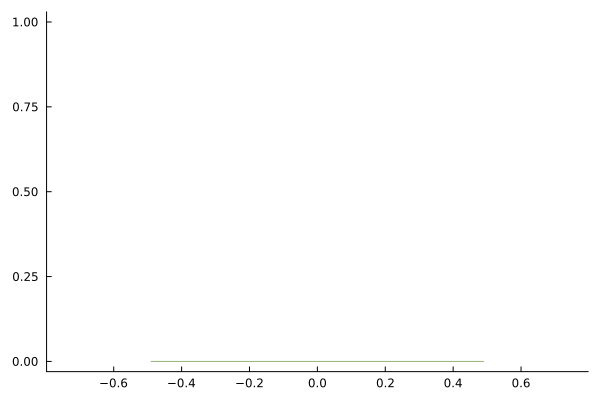

In [11]:
b = Plate(1.0,0.02)
plot(b)

and a flat plate with a 5 percent thickness (and rounded ends)

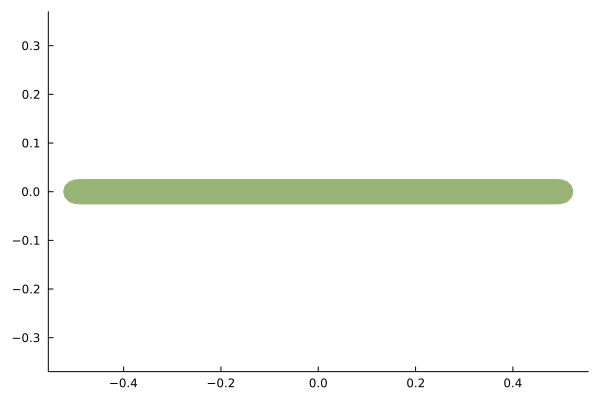

In [12]:
b = ThickPlate(1.0,0.05,0.01)
plot(b)

There are also some generic tools for creating shapes. A `BasicBody` simply
consists of points that describe the vertices. The interface for this is very simple.

In [13]:
x = [1.0, 1.2, 0.7, 0.6, 0.2, -0.1, 0.1, 0.4]
y = [0.1, 0.5, 0.8, 1.2, 0.8, 0.6, 0.2, 0.3]
b = BasicBody(x,y)

Basic pointwise-specified body with 8 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


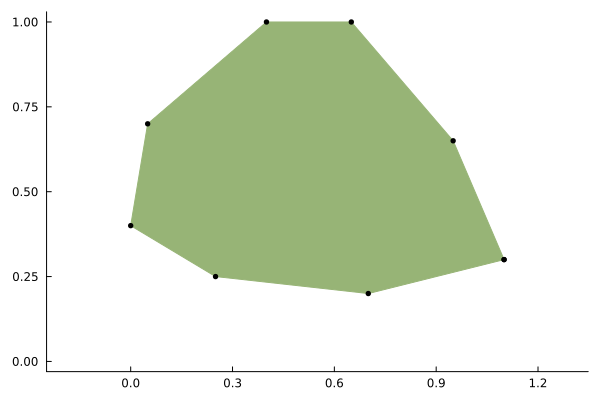

In [14]:
plot(b)
scatter!(b,markersize=3,markercolor=:black)

However, this function does not insert any points along the sides between vertices.
We have to do the work of specifying these points in the original call. For this reason,
there are a few functions that are more directly useful. For example, we can
create a polygon from these vertices, with a specified spacing between points
distributed along the polygon sides

In [15]:
b = Polygon(x,y,0.02)

Closed polygon with 8 vertices and 188 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


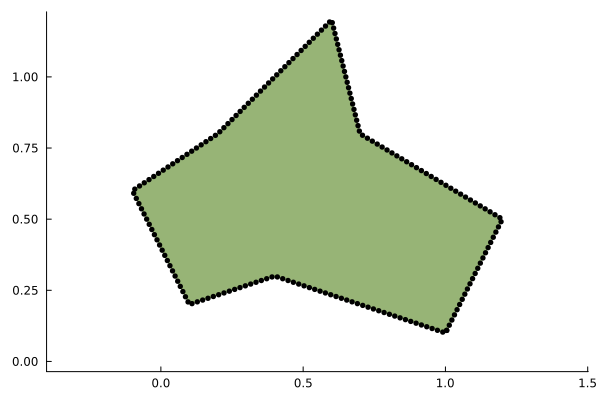

In [16]:
plot(b)
scatter!(b,markersize=3,markercolor=:black)

Alternatively, we can interpret
those original points as control points for splines, with a spacing between points
along the splines provided:

In [17]:
b = SplinedBody(x,y,0.02)

Basic pointwise-specified body with 198 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


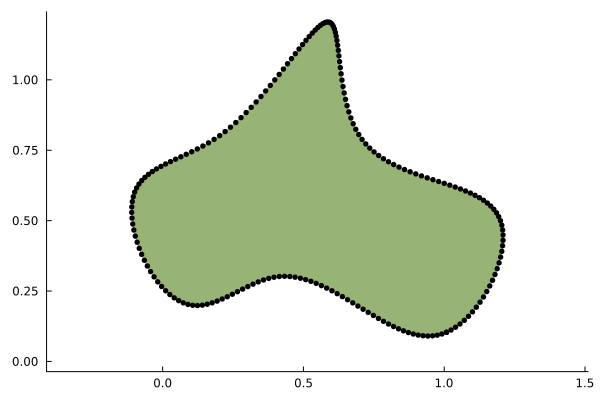

In [18]:
plot(b)
scatter!(b,markersize=3,markercolor=:black)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*